In [1]:
# IMPORTING LIBRARIES AND DATASET

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

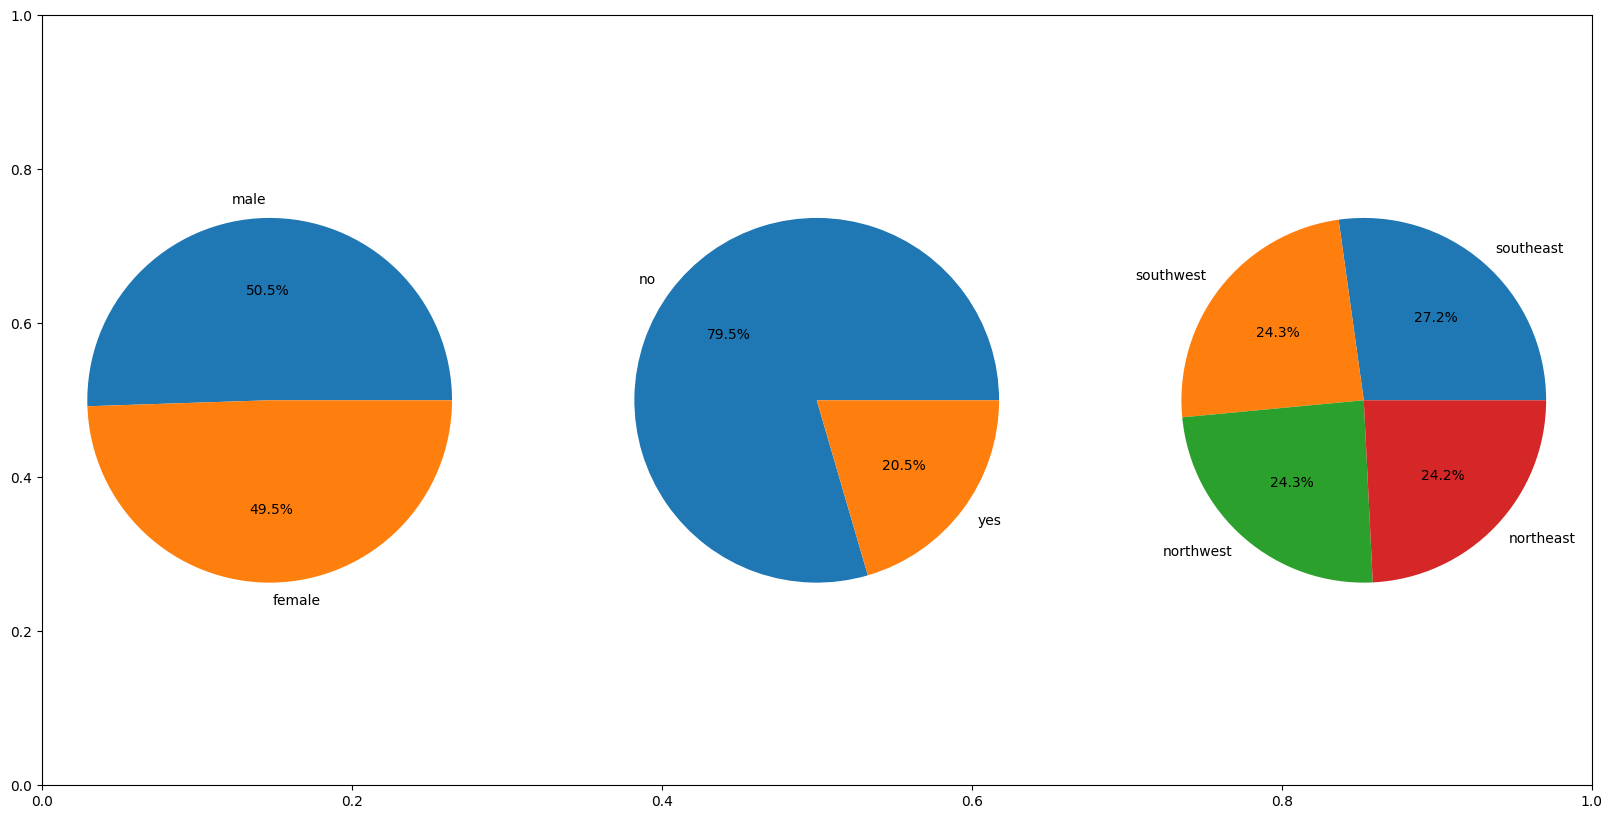

In [7]:
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(1, 3, i + 1)

	x = df[col].value_counts()
	plt.pie(x.values,
			labels=x.index,
			autopct='%1.1f%%')

plt.show()

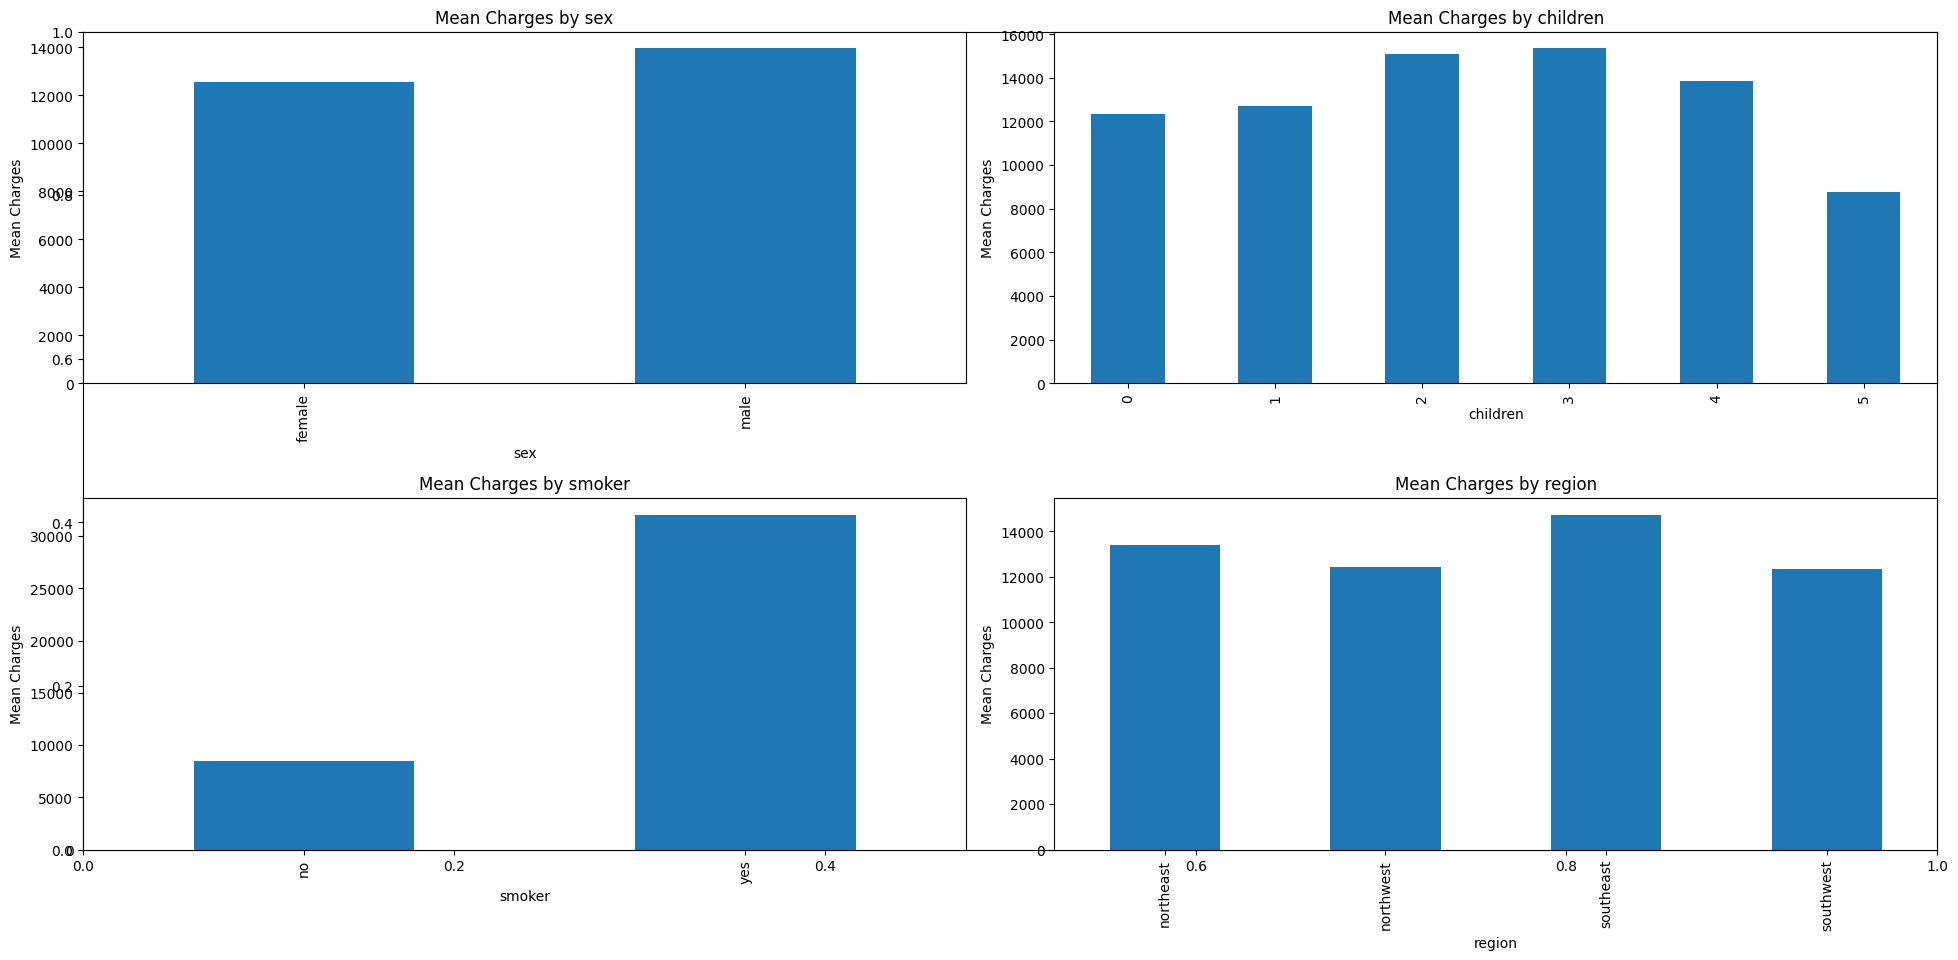

In [8]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    
    # Group by the column and calculate the mean of 'charges'
    mean_charges = df.groupby(col)['charges'].mean()
    
    # Plot the mean charges
    mean_charges.plot.bar()
    
    plt.title(f'Mean Charges by {col}')
    plt.xlabel(col)
    plt.ylabel('Mean Charges')

plt.tight_layout()
plt.show()

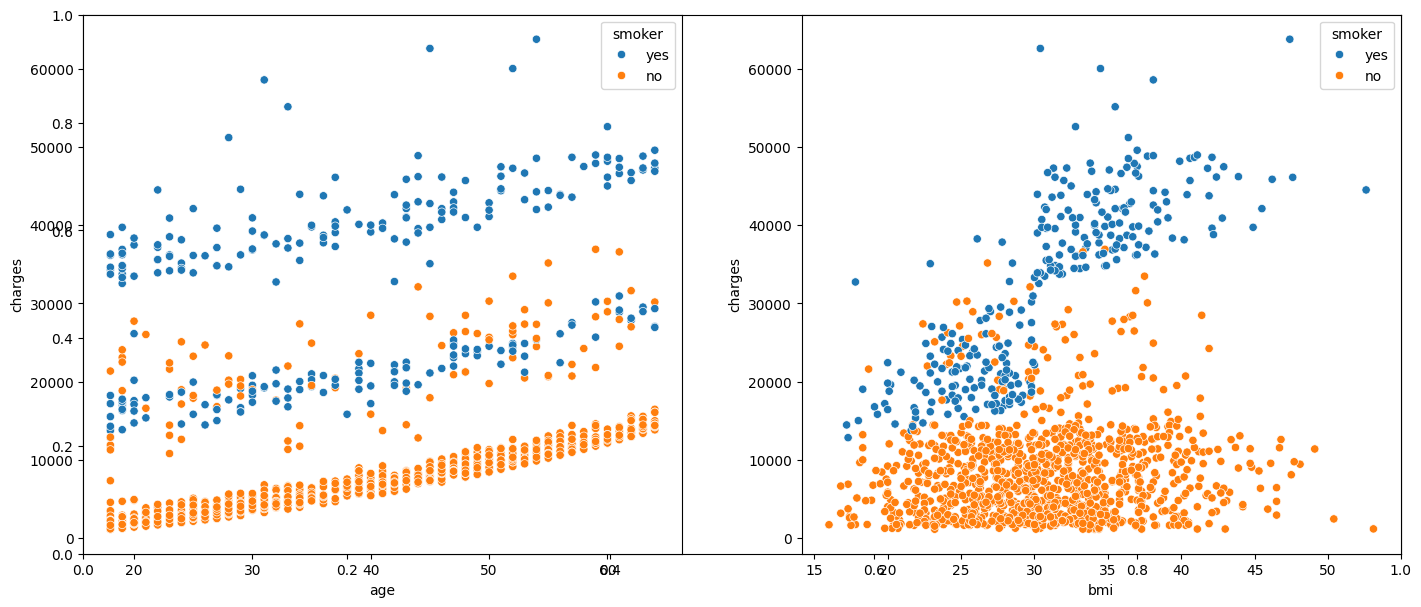

In [9]:
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
	plt.subplot(1, 2, i + 1)
	sns.scatterplot(data=df, x=col,
				y='charges',
				hue='smoker')
plt.show()

In [10]:
# DATA PREPROCESSING

<Axes: ylabel='age'>

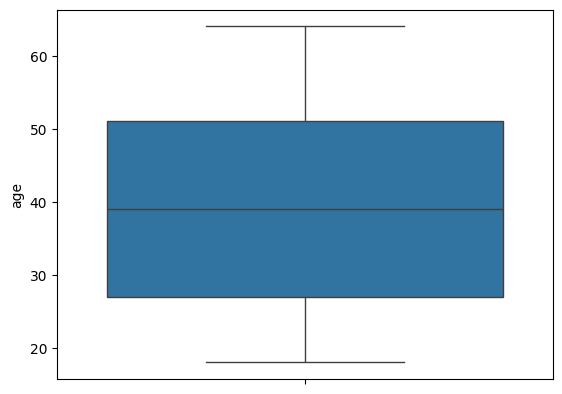

In [11]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

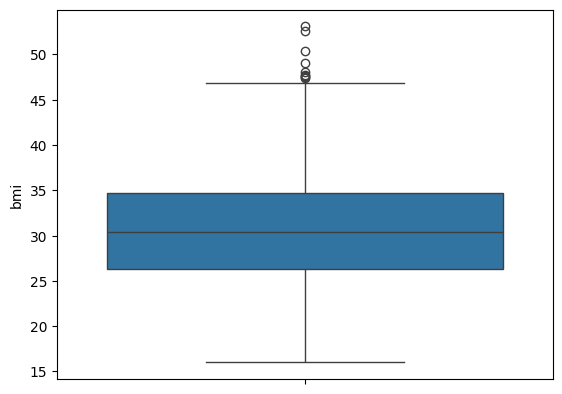

In [12]:
sns.boxplot(df['bmi'])

In [13]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.699999999999998
47.300000000000004


<Axes: ylabel='bmi'>

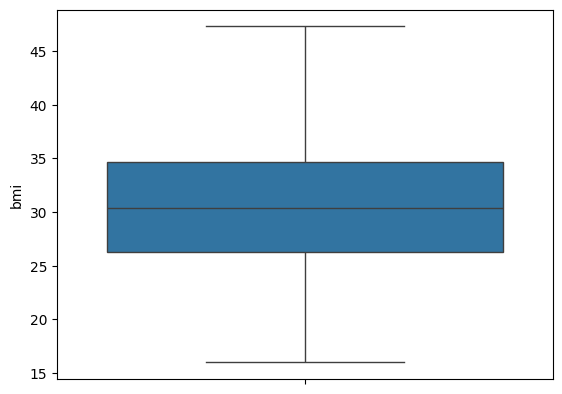

In [14]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6999},max_capping_dict={'bmi':47.3000})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

In [15]:
# DATA WRANGLING

In [16]:
df['bmi'].skew()

0.23313196120545965

In [17]:
df['age'].skew()

0.054780773126998195

In [18]:
# ENCODING

In [19]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [20]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.9,0,1,3,16884.92
1,18,0,33.8,1,0,2,1725.55
2,28,0,33.0,3,0,2,4449.46
3,33,0,22.7,0,0,0,21984.47
4,32,0,28.9,0,0,0,3866.86
...,...,...,...,...,...,...,...
1333,50,0,31.0,3,0,0,10600.55
1334,18,1,31.9,0,0,1,2205.98
1335,18,1,36.9,0,0,2,1629.83
1336,21,1,25.8,0,0,3,2007.95


In [21]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.112074,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.044840,-0.017848,-0.076596,-0.008998,-0.058045
bmi,0.112074,-0.044840,1.000000,0.013578,0.003364,0.156838,0.199296
children,0.041536,-0.017848,0.013578,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003364,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156838,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058045,0.199296,0.067389,0.787234,0.010767,1.000000


In [22]:
# MODEL DEVELOPMENT

In [23]:
X=df.drop(['charges'],axis=1)
Y=df[['charges']]
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
    lrmodel=LinearRegression()
    lrmodel.fit(xtrain,ytrain)
    l1.append(lrmodel.score(xtrain,ytrain))
    l2.append(lrmodel.score(xtest,ytest))
    cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
    l3.append(cvs)
    df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
df1

,train acc,test acc,cvs
0,0.741683,0.778390,0.747086
1,0.756416,0.706280,0.747086
2,0.729569,0.806222,0.747086
3,0.754273,0.732814,0.747086
4,0.742986,0.779584,0.747086
5,0.753297,0.731777,0.747086
6,0.741278,0.776466,0.747086
7,0.731965,0.796159,0.747086
8,0.751938,0.741722,0.747086
9,0.756363,0.722583,0.747086


In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print("Linear Regression:")
print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,X,Y,cv=5,).mean())

Linear Regression:
0.7295687237027799
0.8062218730267348
0.7470864713068939


In [25]:
from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)
print("SVR:")
print(r2_score(ytrain,ypredtrain1))
print(r2_score(ytest,ypredtest1))
print(cross_val_score(svrmodel,X,Y,cv=5,).mean())

SVR:
-0.10151557584778148
-0.13444635819274087
-0.10374610453636417


In [26]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print("Random Forest Regressor:")
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print("Hyper Parameter Tuning:")
print(grid.best_params_)
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())

Random Forest Regressor:
0.9738601477948087
0.8816654160106289
0.8365619819224026
Hyper Parameter Tuning:
{'n_estimators': 120}
0.9746923328436323
0.8819750300066196
0.8371954139613653


In [27]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print("Gradient Boosting Regressor:")
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print("Hyper Parameter Tuning:")
print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())

Gradient Boosting Regressor:
0.8903912282468484
0.900415852069008
0.855508576876898
Hyper Parameter Tuning:
{'learning_rate': 0.2, 'n_estimators': 19}
0.8668967296432014
0.901260150507639
0.860778961577009


In [28]:
xgmodel=XGBRegressor()
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print("XGBRegressor:")
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print("Hyper Parameter Tuning:")
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())

XGBRegressor:
0.995357533910149
0.8656051808723032
0.8087373672029636
Hyper Parameter Tuning:
{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
0.8699851567810317
0.9016817003144124
0.8600637797920363


In [29]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats

,Importance
age,0.039921
sex,0.000000
bmi,0.126126
children,0.012205
smoker,0.817423
region,0.004324


In [30]:
important_features=feats[feats['Importance']>0.01]
important_features

,Importance
age,0.039921
bmi,0.126126
children,0.012205
smoker,0.817423


In [31]:
# FINAL MODEL

In [32]:
df.drop(df[['sex','region']],axis=1,inplace=True)
Xf=df.drop(df[['charges']],axis=1)
X=df.drop(df[['charges']],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=42)
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)
print("Final Model:")
print("Train Accuracy:")
print(r2_score(ytrain,ypredtrain4))
print("Test accuracy:")
print( r2_score(ytest,ypredtest4))
print("CV Score:")
print(cross_val_score(finalmodel,X,Y,cv=5,).mean())

Final Model:
Train Accuracy:
0.8685410818226579
Test accuracy:
0.9013273068410427
CV Score:
0.86042931732906


In [33]:
# SAVE MODEL

In [34]:
from pickle import dump
dump(finalmodel,open('insurancemodelf.pkl','wb'))

In [35]:
# PREDICT ON NEW DATA

In [36]:
new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)

array([18295.182], dtype=float32)